# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

# %matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
import json
btc_data = requests.get(btc_url).json()
print(json.dumps(btc_data, indent=4))

# Fetch current ETH price
# YOUR CODE HERE!
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data, indent=4))

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_data["data"]["1"]["quotes"]["CAD"]["price"]
my_btc_value

my_eth_value = my_eth * eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18785575,
            "total_supply": 18785575,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 46507.0,
                    "volume_24h": 33012518544,
                    "market_cap": 880829165767,
                    "percentage_change_1h": -2.56618803523213,
                    "percentage_change_24h": 0.20095109330815,
                    "percentage_change_7d": 8.65686198801876,
                    "percent_change_1h": -2.56618803523213,
                    "percent_change_24h": 0.20095109330815,
                    "percent_change_7d": 8.65686198801876
                },
                "CAD": {
                    "price": 58203.5105,
                    "volume_24h": 41315166957.816,
                    "mar

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-08-13", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-08-13 00:00:00-04:00  115.65  115.97  115.6401  115.97  4455924  445.59   

                                                            
                             high     low  close    volume  
time                                                        
2021-08-13 00:00:00-04:00  445.93  445.07  445.9  32338962

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:,.2f}")
print(f"Current SPY closing price: ${spy_close_price:,.2f}")

Current AGG closing price: $115.97
Current SPY closing price: $445.90


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $22,295.00
The current value of your 200 AGG shares is $23,194.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
financial_assets = [my_btc_value + my_eth_value, my_spy_value + my_agg_value]
print(financial_assets)

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(financial_assets, index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

[91244.0328555, 45489.0]


,amount
crypto,91244.032856
shares,45489.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

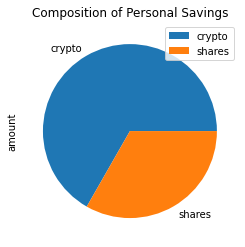

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(title="Composition of Personal Savings", y="amount")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(df_savings.sum())

# Validate saving health
# YOUR CODE HERE!
# if emergency_fund > total_savings:
#      print(f"You should invest {emergency_fund - total_savings}")
# else:
#      print(f"You have a healthy investment {total_savings}  healthy by {total_savings - emergency_fund}")

if total_savings > emergency_fund:
     print(f" Congratulations! You have enough money in your emergency fund, with an extra bumper of ${total_savings - emergency_fund:,.2f}")
elif total_savings == emergency_fund:
     print(f"Congratulations! You have reached your financial goal")
else:
    print(f"You are ${emergency_fund - total_savings:,.2f} away from reaching your financial goal")

 Congratulations! You have enough money in your emergency fund, with an extra bumper of $100,733.03


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_Thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_Thirtyyear.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_Thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005515,0.994114,0.992391,1.003574,0.997366,1.000708,1.011634,1.003331,0.993710,1.006152,...,1.001992,1.005481,1.004717,0.990259,1.005356,1.008071,1.003907,1.015230,0.998674,1.000778
2,1.003338,1.005977,1.010033,1.004110,1.000340,1.005769,1.005786,1.003339,0.992792,0.996183,...,1.009334,1.005430,1.014411,0.990641,1.007705,0.996624,1.011613,1.005931,1.000571,0.996630
3,1.001219,0.998334,1.012428,1.002117,1.016683,0.996530,1.008371,0.998845,0.994329,0.987889,...,1.007308,1.001721,1.021903,1.010731,1.018179,0.992679,1.007453,1.012554,1.010100,1.002449
4,0.994772,0.994702,1.017140,0.991835,1.028279,1.001718,1.013943,1.002281,0.988092,0.991129,...,1.015059,0.997422,1.030783,1.011594,0.998643,1.004438,1.008089,1.008452,1.010360,1.010637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.961914,48.887146,28.241309,8.817468,12.482402,26.797244,45.261668,25.572827,37.687145,8.035474,...,29.667995,8.940846,20.514401,28.375661,13.020359,29.303040,10.136916,48.476876,10.898576,33.301109
7557,11.148133,48.685075,28.463172,8.749688,12.429258,26.798108,44.450843,25.501190,38.126468,8.026965,...,29.618346,8.950715,20.633942,28.211942,12.929446,29.044113,10.201741,48.596462,10.887103,33.066173
7558,11.018138,48.532035,28.344846,8.846786,12.415215,26.567036,44.231065,25.618709,38.196697,8.029741,...,29.316003,8.812037,20.591138,28.418980,13.068747,29.022878,10.357951,48.299279,10.748942,33.437243
7559,10.919098,48.780132,28.173414,8.743514,12.434766,26.549711,44.086036,25.640969,38.275954,7.892223,...,29.404444,8.837916,20.292046,28.417643,13.019357,29.363919,10.477530,47.852973,10.824176,33.849098


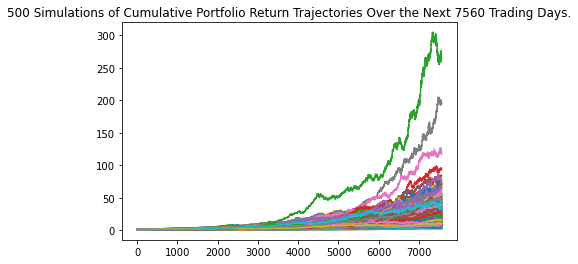

In [20]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_Thirtyyear.plot_simulation()

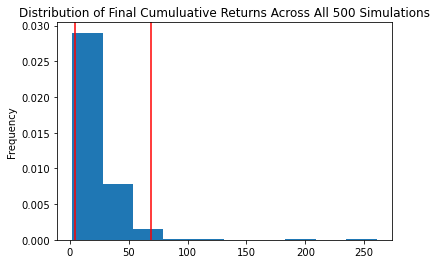

In [21]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_Thirtyyear.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_Thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             22.349372
std              20.492707
min               1.876269
25%              10.879069
50%              16.549965
75%              27.627530
max             260.495930
95% CI Lower      4.582244
95% CI Upper     68.888342
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = list(tbl)[8] * initial_investment
ci_upper = list(tbl)[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $91,644.87 and $1,377,766.84


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = list(tbl)[8] * initial_investment
ci_upper = list(tbl)[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $137,467.31 and $2,066,650.26


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_Fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_Fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000742,0.983340,0.993412,1.021447,0.981782,0.986814,1.021114,0.977754,1.005853,0.998021,...,0.997396,0.992037,1.016197,1.006126,1.011118,1.010693,1.006435,0.996631,1.009592,1.005902
2,1.012397,0.987284,0.978417,1.021879,0.988169,0.995553,1.035222,0.971850,1.009082,1.001385,...,0.992562,0.991411,1.014298,1.011596,1.013924,1.016417,1.007466,0.991944,1.022027,0.993862
3,1.018197,0.981335,0.979785,1.030250,0.979838,0.997862,1.033433,0.961375,1.010859,1.016843,...,1.007284,0.996754,1.010645,1.025394,0.990767,1.018725,0.982495,0.984743,1.012430,0.990355
4,1.041708,0.958325,0.998451,1.039503,0.982404,1.012907,1.030424,0.967278,0.995233,1.015414,...,1.004883,0.989159,1.003392,1.012824,0.994118,0.989284,0.982673,0.986168,1.021244,0.978772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.411994,1.689194,1.368901,1.518010,1.124152,1.898804,2.120203,1.488955,1.357278,2.292909,...,1.496474,1.711740,1.611421,1.082319,2.495708,2.059820,2.891924,1.287915,1.303601,3.727930
1257,2.446630,1.689312,1.369745,1.512546,1.131068,1.906788,2.100146,1.481614,1.367435,2.268729,...,1.482184,1.750925,1.604567,1.058878,2.525791,2.076324,2.900026,1.292623,1.309385,3.723481
1258,2.410050,1.670469,1.364275,1.512057,1.125521,1.939153,2.118281,1.497719,1.377000,2.246209,...,1.469994,1.786433,1.607047,1.072071,2.490430,2.030157,2.892413,1.289185,1.301015,3.795047
1259,2.382831,1.671539,1.380252,1.501446,1.105437,1.930371,2.108558,1.469496,1.401319,2.270780,...,1.456939,1.792958,1.608789,1.082679,2.514420,2.016217,2.946523,1.303023,1.305605,3.856000


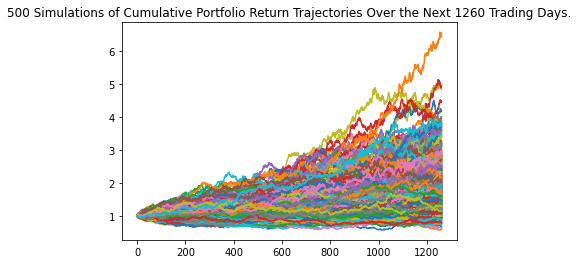

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_Fiveyear.plot_simulation()

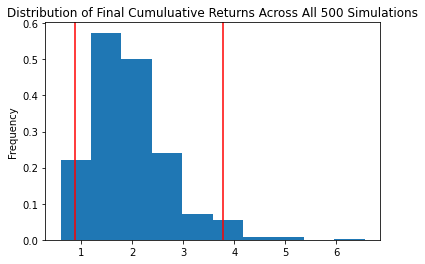

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_Fiveyear.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_Fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.952045
std               0.748195
min               0.596343
25%               1.430640
50%               1.834873
75%               2.345040
max               6.557955
95% CI Lower      0.884099
95% CI Upper      3.772269
Name: 1260, dtype: float64


In [33]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = list(tbl)[8] * initial_investment
ci_upper_five = list(tbl)[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2f} and ${ci_upper_five:,.2f}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 5 years will end within in the range of $53,045.96 and $226,336.15


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_Tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_Tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990767,0.997788,1.001344,1.003439,1.013001,0.981572,0.999076,1.002813,1.004802,1.004609,...,0.996722,0.989132,1.002153,0.993886,1.003598,0.983585,1.006170,1.017766,1.002142,1.003742
2,1.000175,1.001842,1.022074,0.997430,1.013845,0.990678,0.991111,1.015908,1.013915,1.005534,...,1.003474,0.979644,1.005828,1.019983,0.994827,0.985251,0.993661,1.032696,1.009861,0.983802
3,1.009170,1.012049,1.022469,0.990684,1.021060,0.998082,1.001548,1.007522,1.022358,1.004297,...,1.002192,0.980851,1.003737,1.009528,0.985989,0.984465,0.986468,1.040326,1.024832,0.983290
4,0.995130,1.016258,1.023672,1.005930,1.024961,1.014558,1.008310,1.014531,1.021190,1.011129,...,0.995928,0.992559,1.013429,1.020960,0.987162,0.991195,0.978986,1.047190,1.031273,0.985194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.211086,3.843862,3.319255,3.864490,6.745727,2.122712,1.477633,5.189820,2.163088,4.889931,...,2.160382,5.054819,1.245557,9.148930,1.859071,4.559804,4.589563,3.497981,3.335107,4.219363
2517,7.304063,3.863033,3.300624,3.775640,6.671957,2.118872,1.482962,5.218107,2.194269,4.839023,...,2.146324,4.951441,1.241520,9.105856,1.889253,4.566892,4.580067,3.536544,3.332722,4.291422
2518,7.315540,3.853555,3.243797,3.786472,6.723724,2.098853,1.502776,5.221457,2.156707,4.868821,...,2.148223,4.953973,1.212653,9.203993,1.909289,4.513591,4.558724,3.533704,3.386469,4.337628
2519,7.202992,3.836235,3.172331,3.829798,6.865919,2.108297,1.494750,5.186542,2.175209,4.898269,...,2.136062,4.987775,1.219175,9.094078,1.937623,4.563204,4.506799,3.618000,3.415978,4.361677


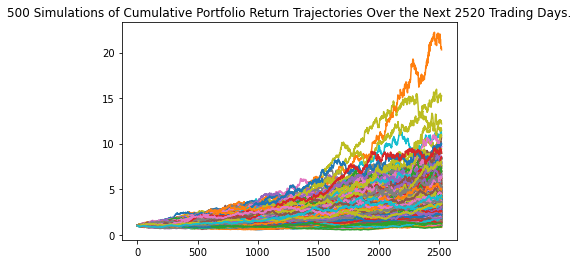

In [36]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_Tenyear.plot_simulation()

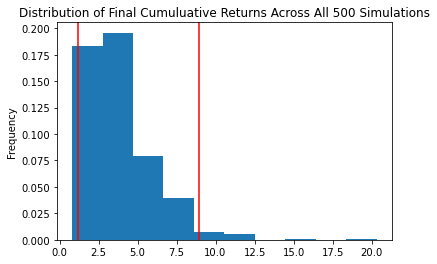

In [37]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_Tenyear.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_Tenyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              3.850769
std               2.229025
min               0.811435
25%               2.302843
50%               3.390382
75%               4.769058
max              20.315846
95% CI Lower      1.184466
95% CI Upper      8.939625
Name: 2520, dtype: float64


In [41]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = list(tbl)[8] * initial_investment
ci_upper_ten = list(tbl)[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 10 years will end within in the range of $71,067.94 and $536,377.51
